In [1]:
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]
raw_data = "../data/raw/covid/"
proc_data = "../data/processed/covid/"

In [2]:
covid = pd.read_csv(raw_data+"owid-covid-data.csv", index_col=None, parse_dates=['date'])

In [3]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48800,NaN,NaN,International,2020-10-04,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48801,NaN,NaN,International,2020-10-05,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48802,NaN,NaN,International,2020-10-06,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48803,NaN,NaN,International,2020-10-07,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
covid.iso_code.unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'ETH', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MKD',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MEX',
       'MDA', '

In [13]:
covid.loc[covid.iso_code.isna()].location.unique()

array(['International'], dtype=object)

In [15]:
covid.iso_code = covid.iso_code.fillna("INT")

In [16]:
covid.iso_code.isna().sum()

0

In [138]:
covid.to_csv(proc_data+"owid-covid-proc.csv", index=False)

In [20]:
covid.date.max()

Timestamp('2020-10-08 00:00:00')

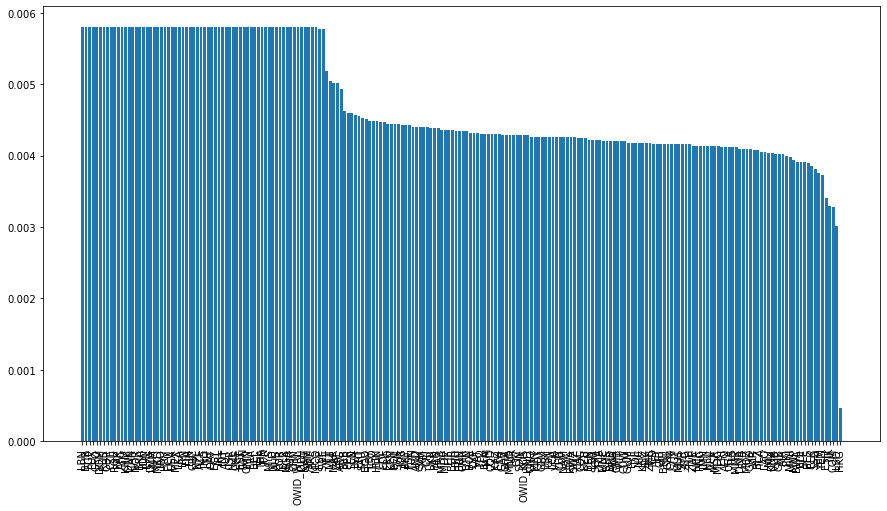

In [32]:
v = covid.iso_code.value_counts().sort_values(ascending=False).values/len(covid.index)
plt.xticks(rotation=90)
plt.bar(covid.iso_code.value_counts().index, v)
plt.show()

In [37]:
covid.iso_code.value_counts().sort_values(ascending=False).head(10)

LBN    283
ISL    283
LTU    283
QAT    283
EGY    283
IRL    283
INT    283
AUT    283
ISR    283
NZL    283
Name: iso_code, dtype: int64

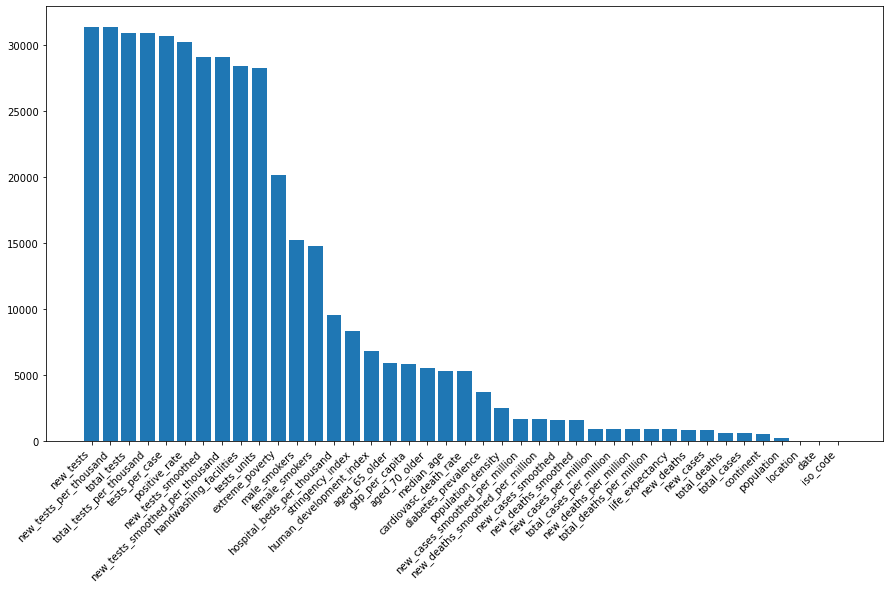

In [137]:
v = (covid.isna().sum()).sort_values(ascending=False)
plt.xticks(rotation=45, ha='right')
plt.bar(v.index, v.values)
plt.show()

In [89]:
top = covid.groupby('iso_code').apply(lambda d: d.new_tests.isna().sum()).sort_values().head(10)
top

iso_code
LVA    1
SAU    3
BGD    4
PRT    4
COL    5
PRY    6
CRI    6
HUN    6
PAN    6
SRB    6
dtype: int64

In [90]:
top = covid.loc[covid.iso_code.isin(top.index)]

In [91]:
top.groupby('iso_code').apply(lambda x: len(x))

iso_code
BGD    220
COL    218
CRI    215
HUN    219
LVA    223
PAN    214
PRT    222
PRY    216
SAU    221
SRB    226
dtype: int64

In [94]:
top.groupby('iso_code').apply(lambda x: x.new_cases.isna().sum()/len(x)).sort_values()

iso_code
CRI    0.000000
PAN    0.004673
PRT    0.009009
HUN    0.009132
SAU    0.018100
PRY    0.023148
COL    0.027523
LVA    0.031390
BGD    0.054545
SRB    0.057522
dtype: float64

In [76]:
policy = pd.read_csv(proc_data+'allvars_location.csv', index_col='record_id', usecols=['record_id', 'ISO_A3'])

In [81]:
tset = set(top.iso_code.unique())
pset = set(policy.ISO_A3.unique())

In [83]:
tset-pset

set()

In [96]:
policy.loc[policy.ISO_A3.isin(tset)].groupby('ISO_A3').apply(lambda x: len(x)).sort_values()

ISO_A3
SRB     19
PRY     32
LVA     64
CRI    102
PRT    105
PAN    106
HUN    109
COL    113
SAU    150
BGD    288
dtype: int64